In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import functions as f

In [7]:
def sigma_b(img, t, bins):
    hist = np.histogram(np.array(img).reshape(-1), bins=bins)
    n1 = sum([hist[0][i] for i in range(t)])
    n2 = sum([hist[0][i] for i in range(t, len(hist[0]))])
    mu1 = sum([hist[0][i]*hist[1][i] for i in range(t)]) / n1
    mu2 = sum([hist[0][i]*hist[1][i] for i in range(t, len(hist[0]))]) / n2
    return n1 *n2 * (mu1 - mu2)**2

In [8]:
def otsu_alg(img, bins):
    t_optim = 0
    s_b = -1
    hist = np.histogram(np.array(img).reshape(-1), bins=bins)
    for t in range(1, len(hist[0])):
        s_b_tmp = sigma_b(img, t, bins=bins)
        if s_b_tmp > s_b:
            s_b = s_b_tmp
            t_optim = t
    return hist[1][t_optim]

In [9]:
def bin_img(img, t):
    img_arr = np.array(img)
    return np.where(img_arr <= t, 0, 1)

In [10]:
otsu_exp_1 = Image.open("text_1.jpg")
otsu_exp_2 = Image.open("text_2.jpg")
otsu_exp_1.load()
otsu_exp_2.load()
otsu_exp_1 = f.make_grey(otsu_exp_1.resize(f.calc_size(otsu_exp_1.size, 512)))
otsu_exp_2 = f.make_grey(otsu_exp_2.resize(f.calc_size(otsu_exp_2.size, 512)))
print(np.array(otsu_exp_1).shape)
print(np.array(otsu_exp_2).shape)

(375, 512)
(406, 512)


In [11]:
otsu_img1_t = otsu_alg(otsu_exp_1, 500)
otsu_img2_t = otsu_alg(otsu_exp_2, 500)
print(otsu_img1_t, otsu_img2_t)

97.78266666666666 113.91666666666669


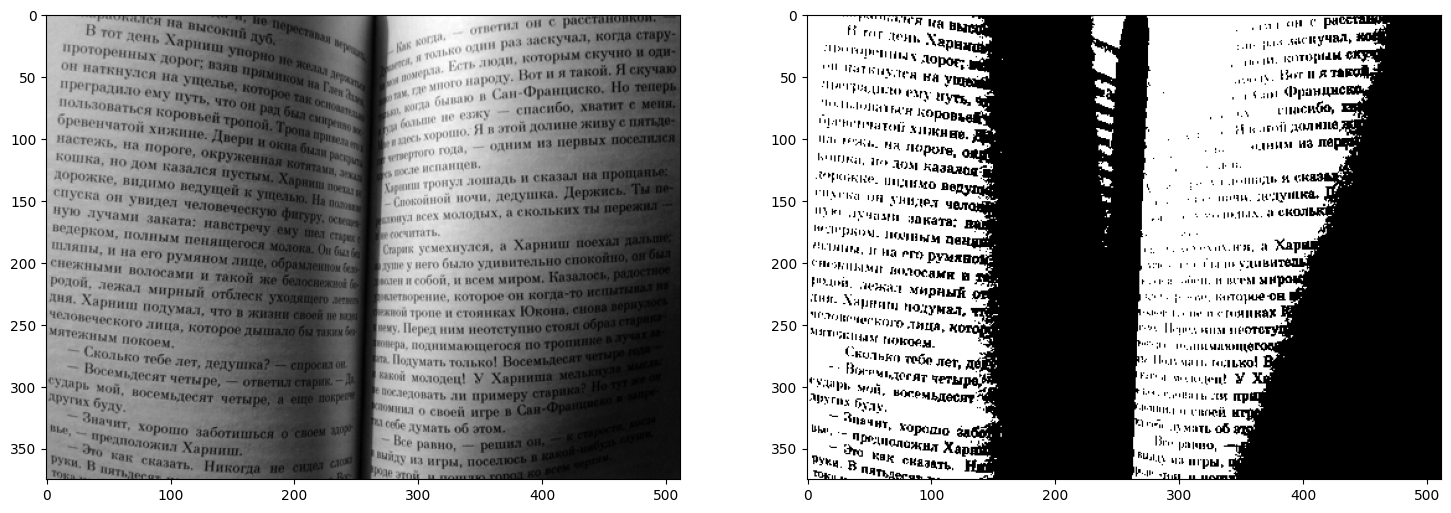

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].imshow(otsu_exp_1, cmap="gray")
ax[1].imshow(bin_img(otsu_exp_1, otsu_img1_t), cmap="gray")

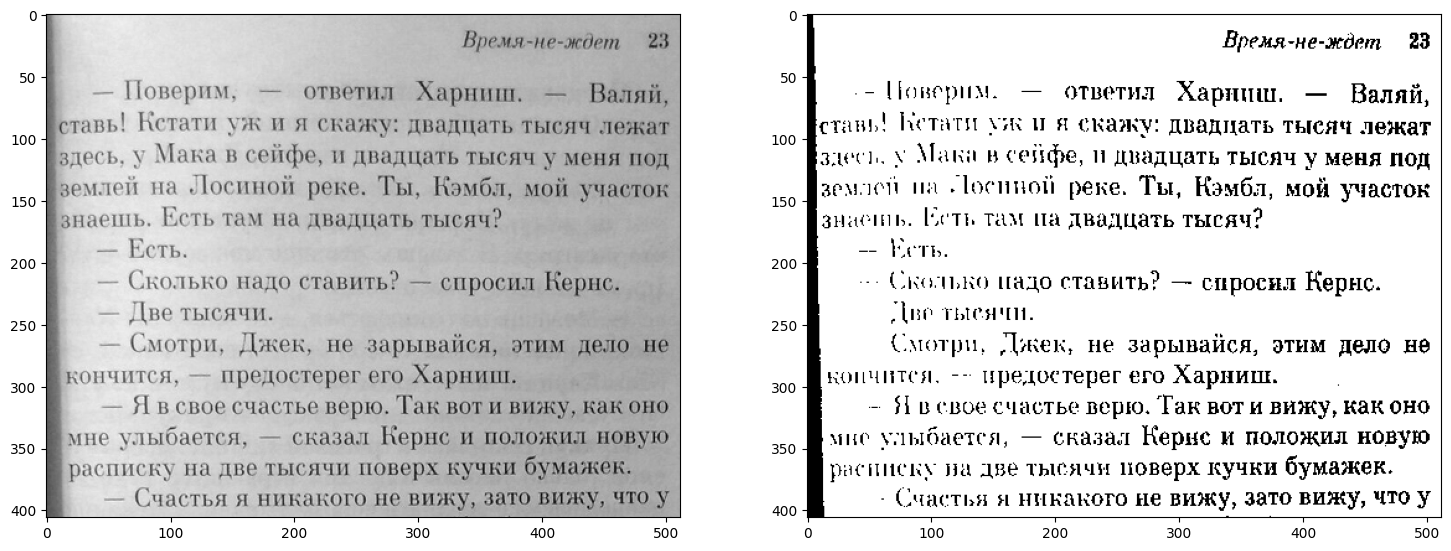

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].imshow(otsu_exp_2, cmap="gray")
ax[1].imshow(bin_img(otsu_exp_2, otsu_img2_t), cmap="gray")

In [14]:
g = [0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
otsu_g_cor = []
otsu_g_cor_t = []
for g_i in g:
    g_cor_tmp = f.g_cor(otsu_exp_2, g_i)
    otsu_g_cor.append(g_cor_tmp)
    otsu_g_cor_t.append(otsu_alg(g_cor_tmp, 500))

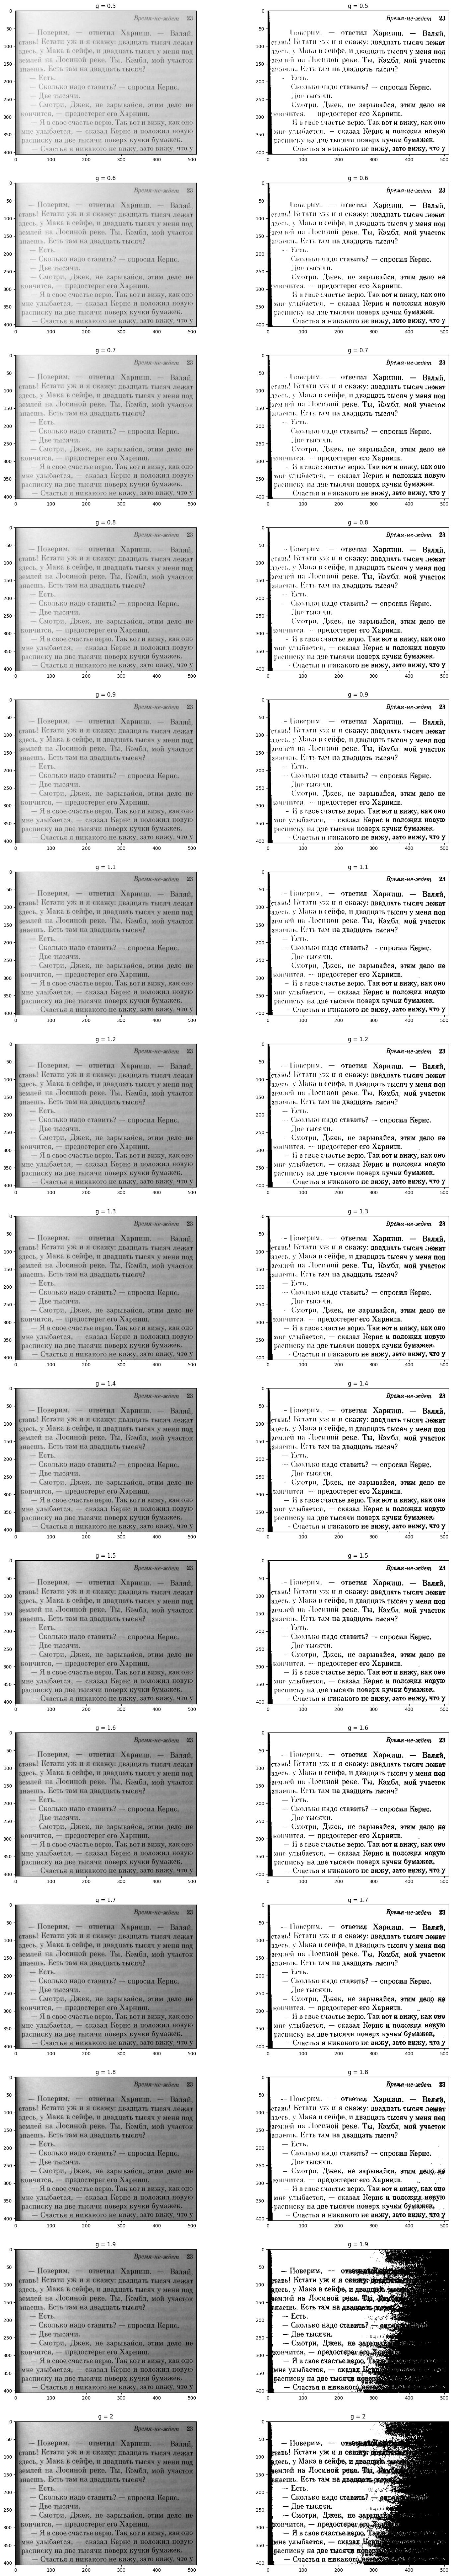

In [15]:
fig, ax = plt.subplots(len(g), 2, figsize=(18, 100))
for i in range(len(g)):
    ax[i][0].imshow(otsu_g_cor[i], cmap="gray")
    ax[i][1].imshow(bin_img(otsu_g_cor[i], otsu_g_cor_t[i]), cmap="gray")
    ax[i][0].set_title("g = {}".format(g[i]))
    ax[i][1].set_title("g = {}".format(g[i]))